In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from scipy.signal import savgol_filter
import matplotlib.lines as mlines

In [2]:
# Dữ liệu bắt đầu từ cột thứ nhất, do cột 0 là cột thời gian
data = pd.read_excel("milk-powder-IR.xlsx").iloc[:, 1:]

Tách ra ma trận tín hiệu và label

In [3]:
# Tách ra ma trận tín hiệu X và nhãn thật giả (y)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
print(X.shape, y.shape)

(40, 601) (40,)


Chia tập train, test

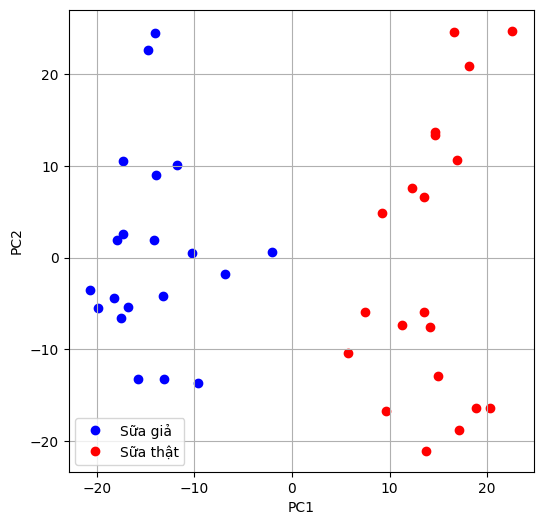

In [4]:
X = np.log(1.0/X)
X = savgol_filter(X, window_length=25, polyorder=5, deriv=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(6,6))
fake = mlines.Line2D([], [], color='blue', marker='o', ls='', label='Sữa giả')
real = mlines.Line2D([], [], color='red', marker='o', ls='', label='Sữa thật')
plt.grid()
plt.scatter(X_pca[y == 0][:, 0], X_pca[y == 0][:, 1], c='blue')
plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], c='red')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(handles=[fake, real])
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)

In [6]:
# print(X_train.shape,X_test.shape, X_val.shape)

Phổ IR của sữa giả

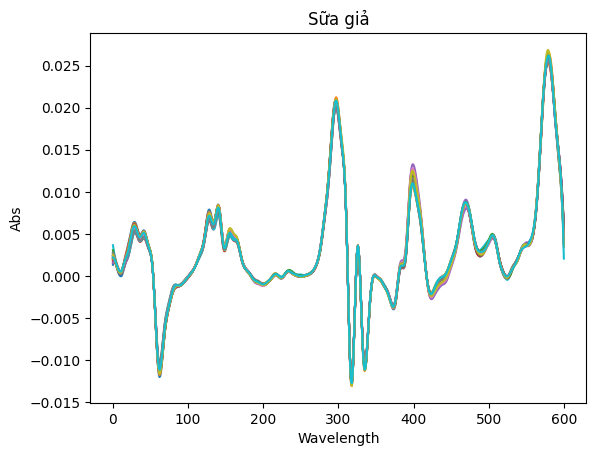

In [7]:
# Vẽ phổ IR của các mẫu sữa giả
loai_0 = X[y == 0]
plt.plot(loai_0.T)
plt.title('Sữa giả')
plt.xlabel('Wavelength')
plt.ylabel('Abs')
plt.show()

Phổ IR của sữa thật

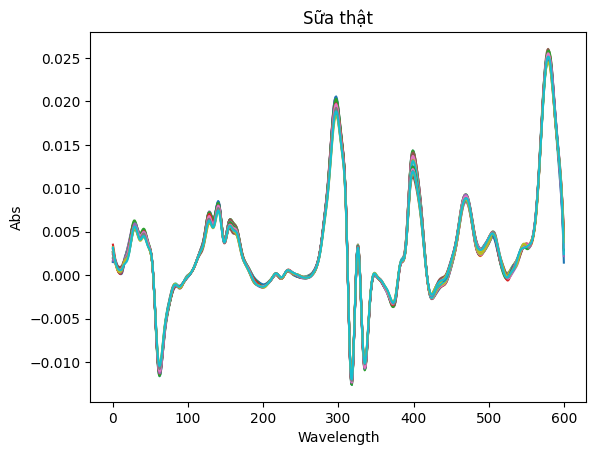

In [8]:
# Vẽ phổ IR của các mẫu sữa thật
loai_1 = X[y == 1]
plt.plot(loai_1.T)
plt.title('Sữa thật')
plt.xlabel('Wavelength')
plt.ylabel('Abs')
plt.show()

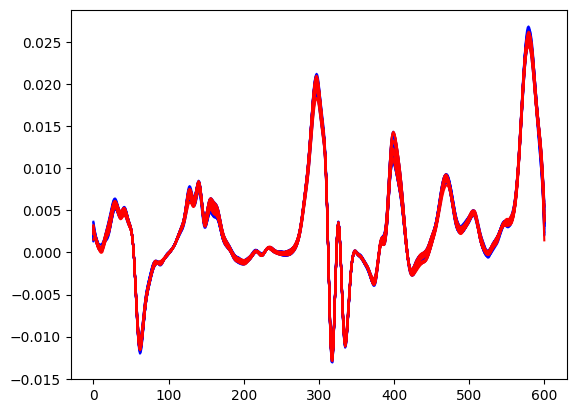

In [9]:
# Vẽ phổ IR của tập train, test và validate
plt.plot(X_train.T, c='b')
plt.plot(X_test.T, c='r')
# plt.plot(X_val.T, c='g')
plt.show()

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# X_val_scaled = scaler.transform(X_val)

In [11]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

PCA

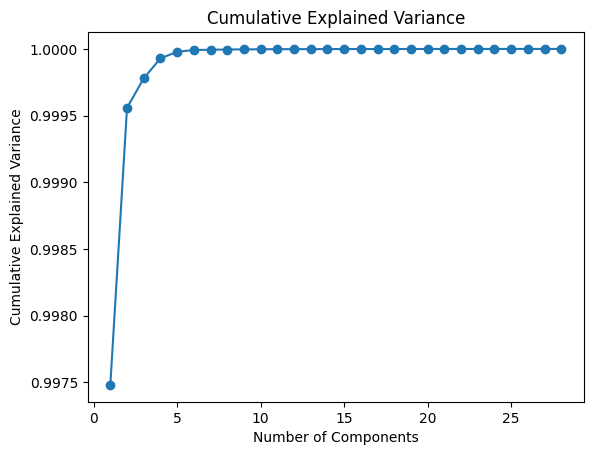

In [ ]:
pca = PCA()
pca.fit(X_train, y_train)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [ ]:
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [ ]:
plt.scatter(X_train_pca)

In [ ]:
from sklearn.linear_model import LogisticRegression
for i in range (1, X_train.shape[0]):
    # Tiến hành PCA với i cấu tử chính
    pca = PCA(i)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    # Tạo mô hình logistic và học X_train đã pca và y_train
    log_reg = LogisticRegression().fit(X_train_pca, y_train)
    # Sử dụng mô hình để dự đoán dựa trên X_val đã PCA
    y_val_pred = log_reg.predict(X_val_pca)
    # Tính toán độ chính xác so với giá trị thực tế
    print(f"Accuracy of {i} PC on validation:",accuracy_score(y_val, y_val_pred))

NameError: name 'X_val_scaled' is not defined

Độ chính xác + ma trận nhầm lẫn

Accuracy: 1.0
    Predict  Test
0         0     0
1         0     0
2         1     1
3         0     0
4         1     1
5         1     1
6         1     1
7         0     0
8         0     0
9         1     1
10        1     1
11        0     0


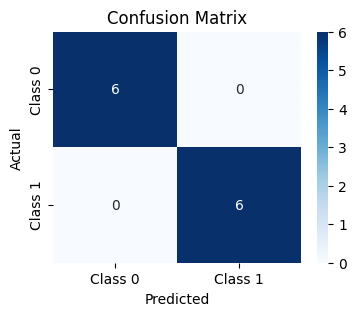

In [ ]:
pca = PCA(3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

LR = LogisticRegression().fit(X_train_pca, y_train)
y_pred = LR.predict(X_test_pca)
print("Accuracy:",accuracy_score(y_test, y_pred))

# In ra bảng so sánh giá trị dự đoán và thực tế
pred_df = pd.DataFrame(y_pred, columns=["Predict"])
test_df = pd.DataFrame(y_test.values, columns=["Test"])
final_df = pd.concat([pred_df, test_df], axis=1)
print(final_df)
# In ra ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()